# DATA COLLECTION AND DATA PREPARATION

### Loading the libraries for the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

import os
from pandas_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")


### Loading the data

In [2]:
url="Heart_kaggle1.xlsx"
df =pd.read_excel(url)

### Size of data set

In [3]:
print("Rows: ",len(df))
print("Column: ",df.shape[1])

Rows:  1025
Column:  14


### First 5 rows of the dataset

In [4]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### The statistical characteristics of the data

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Finding out Missing values

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Total percentage of missing data

In [7]:
missing_data = df.isnull().sum()
total_percentage = (missing_data.sum()/df.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 0.0%


### Values in the database

In [8]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex : [1 0]
cp : [0 1 2 3]
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs :

### Attributes in the dataset

In [9]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# EXPLORATORY DATA ANALYSIS

### Case Counts

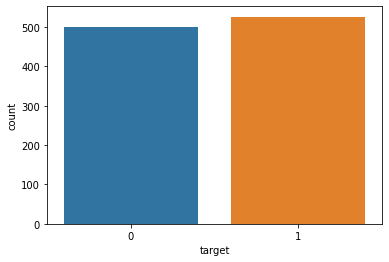

There are 499 patients without heart disease and 526 patients with the disease


In [10]:
sns.countplot(x='target',data=df)
plt.show()
cases = df.target.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

### Number of people who have disease vs age

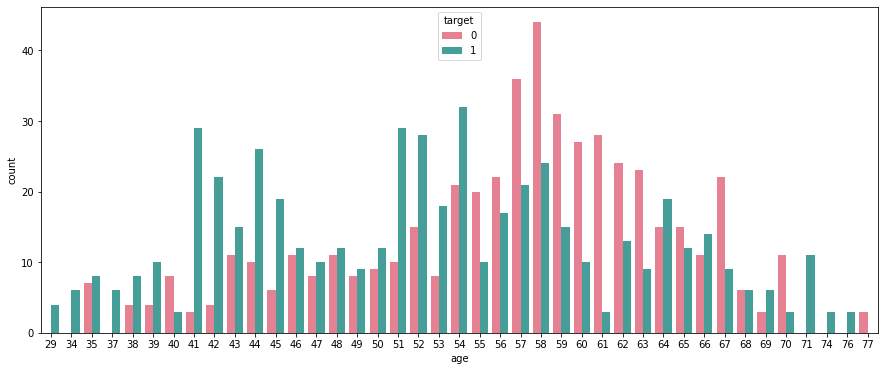

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='husl')
plt.show()

### Age Distribution 

Text(0.5, 1.0, 'Age distribution.')

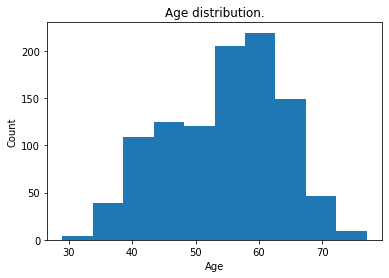

In [12]:
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution.')

#### From the Age Distribution Graph above obtained we observe that people between the age 40 and 70 are more likely to get to have heart diseases.

### Gender vs Frequency barplot

<AxesSubplot:xlabel='Sex', ylabel='Frequency'>

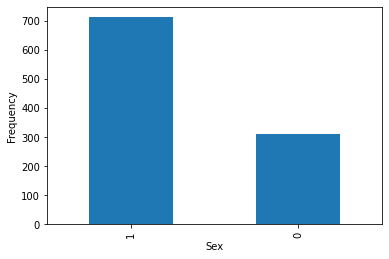

In [13]:
plt.xlabel('Sex')
plt.ylabel('Frequency')
df['sex'].value_counts().plot.bar()

### Investigating age values

In [14]:
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.43414634146342


### Splitting the data on basis on the presence and absence of heart disease

In [15]:
presence = df[df['target']==1]
absence = df[df['target']==0]

In [16]:
check = presence[presence['age']>40]
check = check[check['age']<70]
check

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
18,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
19,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
21,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1


In [17]:
male = check[check['sex']==1]
female = check[check['sex']==0]

### Number of people within the range of 40<age<70

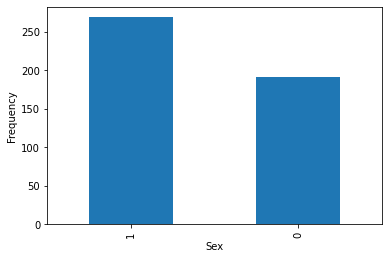

In [18]:
plt.xlabel('Sex')
plt.ylabel('Frequency')
check['sex'].value_counts().plot.bar()
plt.show()

#### From the above data analysis we can observe that the percentage of men have more possibility of having heart disease as compared to women.

### Observation of different attributes

In [19]:
check.shape

(461, 14)

In [20]:
print(f"GENDER")
cases = check.sex.value_counts()
print(f"Gender")
print(f"Female = {cases[0]}\nMale = {cases[1]}\n")

print(f"CHEST PAIN")
cases = check.cp.value_counts()
print(f"Chest Pain")
print(f"Typical = {cases[0]}\nAtypical = {cases[1]}\nNon-anginal = {cases[2]}\nasymptomatic = {cases[3]}\n")

print(f"FASTING BLOOD SUGAR")
cases = check.fbs.value_counts()
print(f"Fasting Blood Sugar >120 mg/dL")
print(f"False = {cases[0]}\nTrue = {cases[1]}\n")

print(f"EXERCISE INDUCED ANGINA")
cases = check.exang.value_counts()
print(f"Yes = {cases[0]}\nNo = {cases[1]}")


GENDER
Gender
Female = 192
Male = 269

CHEST PAIN
Chest Pain
Typical = 114
Atypical = 114
Non-anginal = 188
asymptomatic = 45

FASTING BLOOD SUGAR
Fasting Blood Sugar >120 mg/dL
False = 394
True = 67

EXERCISE INDUCED ANGINA
Yes = 396
No = 65


#### From this analysis we can observe that men have more chances of getting the heart disease. We also see that people with non-anginal type of chest pain has high probability having heart disease as compared to other. It is also seen that majority og people have their fasting blood sugar level under 120 mg/dL. It can also be detected that more than 80% of heart diseases are due to exercise induced angina.

### Resting Blood Pressure

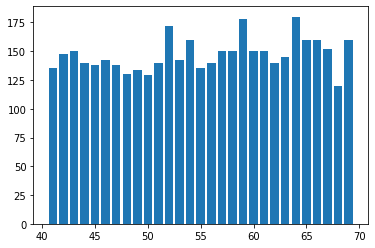

Minimum Resting Blood Pressure: 94
Maximum Resting Blood Pressure: 180
High blood pressure count =  293
Low blood pressure count =  0


In [21]:
x=check['age']
y=check['trestbps']
plt.bar(x,y)
plt.show()

mincp=min(check.trestbps)
maxcp=max(check.trestbps)
print('Minimum Resting Blood Pressure:',mincp)
print('Maximum Resting Blood Pressure:',maxcp)
cases = check.trestbps.value_counts()
count = 0
for i in check['trestbps'] :
    if i > 120 :
        count = count+1
print(f"High blood pressure count = ",count)

count = 0
for i in check['trestbps'] :
    if i <80 :
        count = count+1
print(f"Low blood pressure count = ",count)

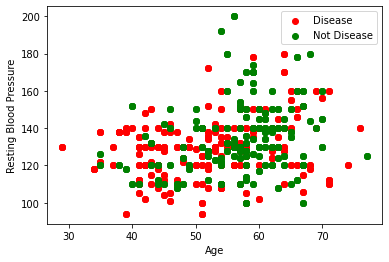

In [22]:
plt.scatter(x=df.age[df.target==1], y=df.trestbps[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.trestbps[(df.target==0)], c="green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.show()

#### The normal resting blood pressure is 120 md/dL. From the information we can also see that people have high blood pressure who have a posibility of getting a heart disease. 

### Serum Cholestoral levels 

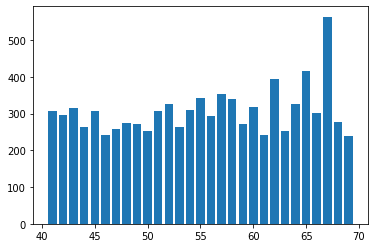

Minimum Serum cholestoral: 126
Maximum Serum cholestoral: 564
Higher Serum Cholestoral count =  394


In [23]:
x=check['age']
y=check['chol']
plt.bar(x,y)
plt.show()

mincp=min(check.chol)
maxcp=max(check.chol)
print('Minimum Serum cholestoral:',mincp)
print('Maximum Serum cholestoral:',maxcp)

count = 0
for i in check['chol'] :
    if i > 200 :
        count = count+1
print(f"Higher Serum Cholestoral count = ",count)


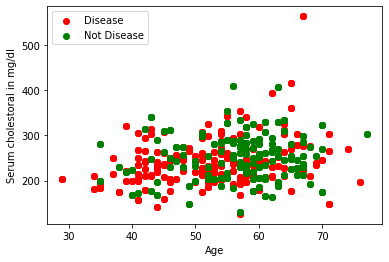

In [24]:
plt.scatter(x=df.age[df.target==1], y=df.chol[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.chol[(df.target==0)], c="green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Serum cholestoral in mg/dl")
plt.show()

#### The Serum Cholestoral level of a healthy person is 125 mg/dL - 200 mg/dL. From the information we can observe that people have higher serum cholestrol  level who have a posibility of getting a heart disease. 

### Maximum Heart Rate

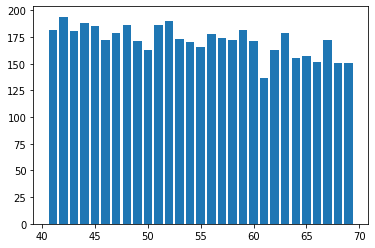

Minimum heart rate: 96
Maximum heat rate: 194
Higher heart rate count =  461


In [25]:
x=check['age']
y=check['thalach']
plt.bar(x,y)
plt.show()

mincp=min(check.thalach)
maxcp=max(check.thalach)
print('Minimum heart rate:',mincp)
print('Maximum heat rate:',maxcp)

count = 0
for i in check['thalach'] :
    if i > 80:
        count = count+1
print(f"Higher heart rate count = ",count)


In [ ]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

#### The Heart Rate of an healthy person is 60 - 100 beats per minute. From the information we can observe that people have higher heart rate have a posibility of getting a heart disease.

### Ploting histogram to see the distribution of the data

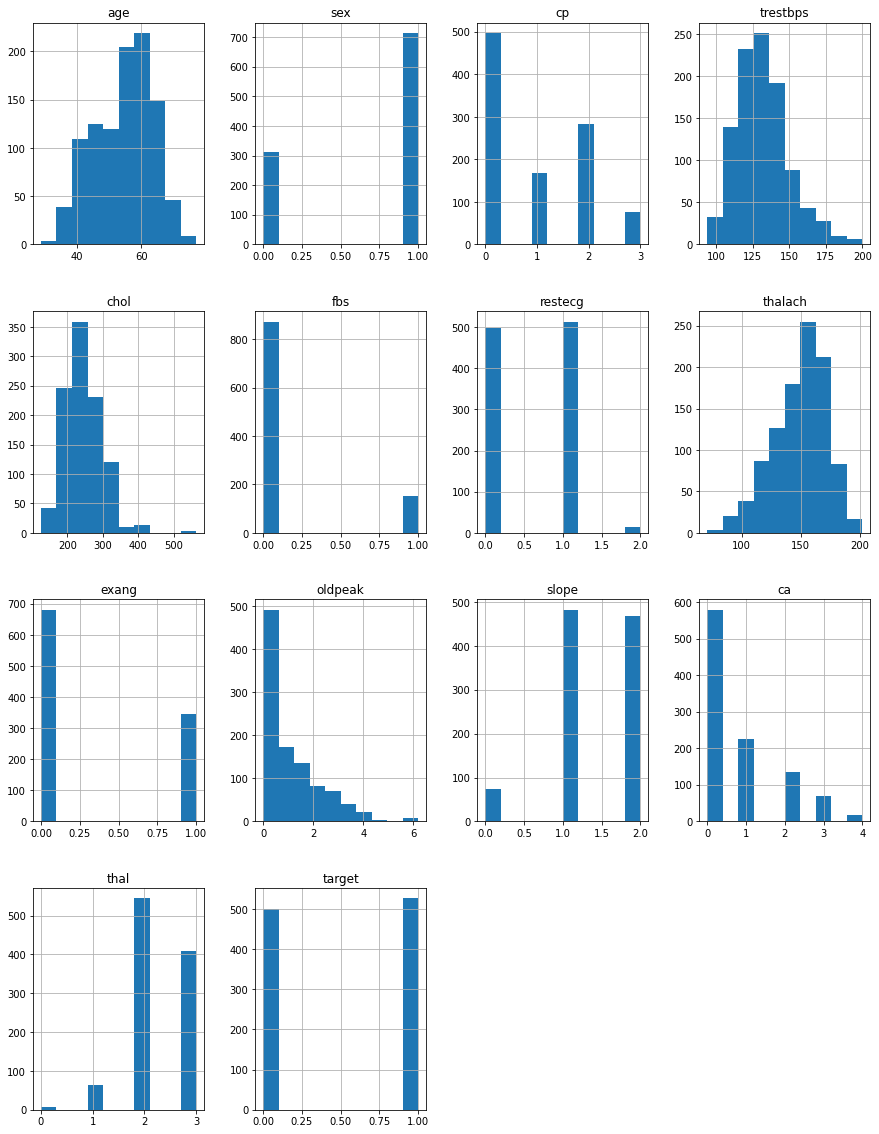

In [26]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

# MODELLING AND MODEL EVALUATION

### Splitting dataset into Train test

In [ ]:
y = df["target"]
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

### Scaling dataset

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Fitting And Training Model

### Stochastic Gradient Descent Model

In [ ]:
model_sgd = 'Stochastic Gradient Descent'
sgdc = SGDClassifier(max_iter=5000, random_state=0)
sgdc.fit(X_train, y_train)
sgdc_predicted = sgdc.predict(X_test)
sgdc_conf_matrix = confusion_matrix(y_test, sgdc_predicted)
sgdc_acc_score = accuracy_score(y_test, sgdc_predicted)
print("Confussion Matrix")
print(sgdc_conf_matrix)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print("Accuracy of : Stochastic Gradient Descent",sgdc_acc_score*100)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print(classification_report(y_test,sgdc_predicted))

### K-NeighborsClassifier Model

In [ ]:
model_knn = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("Confussion matrix")
print(knn_conf_matrix)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print(classification_report(y_test,knn_predicted))

### Extreme Gradient Boost

In [ ]:
model_egb = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("Confussion matrix")
print(xgb_conf_matrix)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print(classification_report(y_test,xgb_predicted))

### DecisionTreeClassifier Model

In [ ]:
model_dtc = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("Confussion matrix")
print(dt_conf_matrix)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print(classification_report(y_test,dt_predicted))


### Random Forest Classfier Model

In [ ]:
model_rfc = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Confussion matrix")
print(rf_conf_matrix)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print("Accuracy of Random Forest:",rf_acc_score*100)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print(classification_report(y_test,rf_predicted))

### Model Comparison

In [ ]:
model_ev = pd.DataFrame({'Model': ['Stochastic Gradient Descent','K-Nearest Neighbour','Extreme Gradient Boost','Decision Tree','Random Forest'], 
                        'Accuracy':[ sgdc_acc_score*100, knn_acc_score*100,xgb_acc_score*100,dt_acc_score*100, rf_acc_score*100 ]})
model_ev

### Graphical Model Comparison

In [ ]:
colors = ['red','green','blue','gold','silver','yellow','orange','magenta', 'cyan']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.xticks(rotation=90)
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()